In [2]:
%matplotlib inline
from matplotlib import rcParams

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

*Answer here*

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [4]:
# code here# code here
dataset = pd.read_csv('./bank-full.csv', sep=";")

Print a summary of the data as well as the first 5 rows.

In [5]:
# code here
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [8]:
# code here
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = dataset[numerical_features]

In [9]:
# Step 2: Remove missing values
df_numerical = df_numerical.dropna()

In [10]:
from sklearn.preprocessing import StandardScaler
# Step 3: Normalize the dataset
scaler = StandardScaler()
df_norm_values = scaler.fit_transform(df_numerical)
df_norm = pd.DataFrame(df_norm_values, columns=numerical_features)

In [11]:
# Save the normalized DataFrame as a Pickle file
df_norm.to_pickle('./df_norm.pkl')

Plot histograms of features

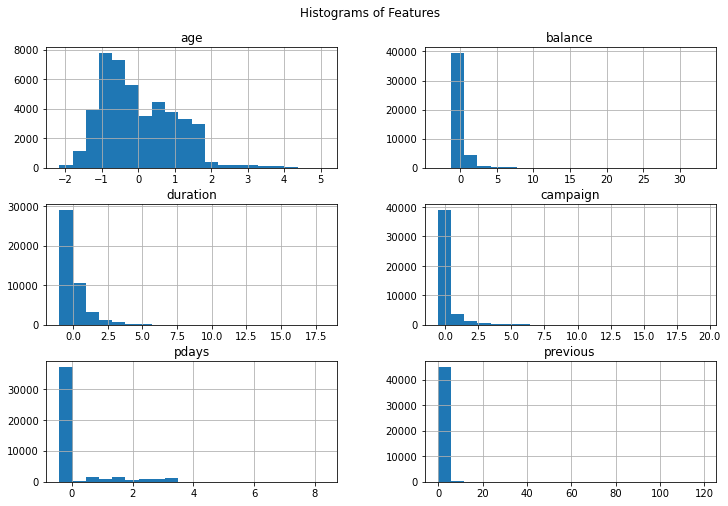

In [12]:
import matplotlib.pyplot as plt

# Assuming 'df_norm' is your normalized DataFrame
df_norm.hist(figsize=(12, 8), bins=20)  # Adjust figsize and bins as needed
plt.suptitle('Histograms of Features', y=0.95)
plt.show()


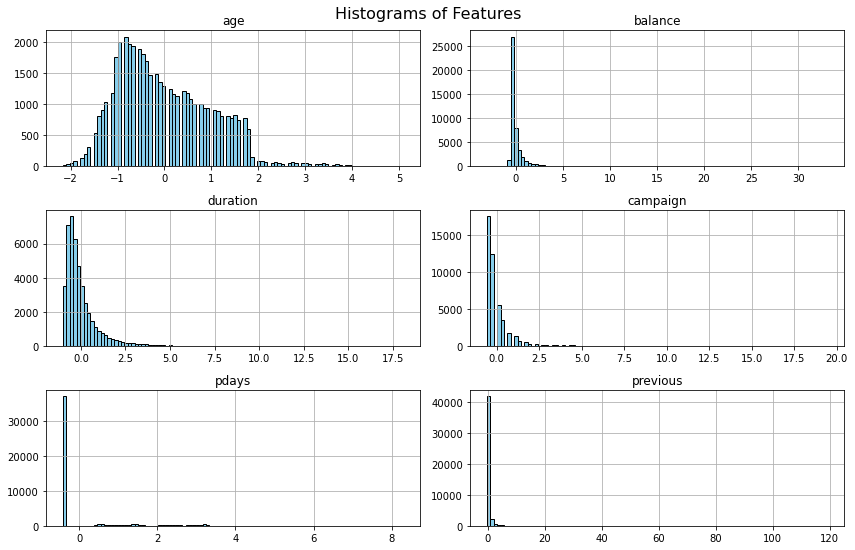

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_norm' is your normalized DataFrame
# Assuming 'numerical_features' is the list of numerical features
df_norm[numerical_features].hist(figsize=(12, 8), bins=100
, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', y=0.95, fontsize=16)

# Customize individual plot characteristics if needed
plt.tight_layout()
plt.show()


## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?

A centroid is a central point within a cluster or a set of data points. It represents the average position of all the points in a cluster and serves as a central reference point. In geometric terms, the centroid is often the mean position of all the points in a given set.

2. How can you compute a centroid?

The centroid of a set of points in a multidimensional space is calculated by finding the mean or average position along each dimension. For a set of 2D points, the centroid's x-coordinate is the average of all x-coordinates, and the y-coordinate is the average of all y-coordinates. Similarly, for higher dimensions, the centroid is computed by taking the mean along each dimension.

3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?

Yes, in the KMeans algorithm, you typically need to specify the number of clusters (k) in advance. The algorithm partitions the data into k clusters based on the similarity of data points. Selecting the appropriate value for k is often a critical step, and various methods, such as the elbow method or silhouette analysis, can be employed to help determine an optimal value for k. However, specifying the number of clusters is a crucial aspect of using the KMeans algorithm effectively.


*Answer here*

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [14]:
# code here
from sklearn.cluster import KMeans


#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [15]:


# Set the number of clusters
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the normalized data
kmeans.fit(df_norm)

# Add the cluster labels to the original DataFrame
df_norm['cluster_label'] = kmeans.labels_

# Display the count of data points in each cluster
print(df_norm['cluster_label'].value_counts())

# Display the first few rows of the DataFrame with cluster labels
print(df_norm.head())


/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_label
0    20694
1    13246
4     6117
3     3549
2     1605
Name: count, dtype: int64
        age   balance  duration  campaign     pdays  previous  cluster_label
0  1.606965  0.256419  0.011016 -0.569351 -0.411453  -0.25194              1
1  0.288529 -0.437895 -0.416127 -0.569351 -0.411453  -0.25194              0
2 -0.747384 -0.446762 -0.707361 -0.569351 -0.411453  -0.25194              0
3  0.571051  0.047205 -0.645231 -0.569351 -0.411453  -0.25194              1
4 -0.747384 -0.447091 -0.233620 -0.569351 -0.411453  -0.25194              0


Print the centroids obtained

In [16]:
# code here
# Get the centroids
centroids = kmeans.cluster_centers_
#Create a DataFrame to display the centroids
centroids_df = pd.DataFrame(centroids, columns=df_norm.columns[:-1])  # Exclude the 'cluster_label' column

# Print the centroids DataFrame
print("Centroids:")
print(centroids_df)

Centroids:
        age   balance  duration  campaign     pdays  previous
0 -0.644409 -0.150286 -0.224987 -0.156303 -0.374942 -0.220118
1  1.101235  0.239948 -0.237382 -0.106522 -0.326327 -0.185082
2 -0.068242 -0.095455 -0.451181  3.921592 -0.399881 -0.240594
3 -0.067668  0.043046  2.555048 -0.108843 -0.260476 -0.157319
4 -0.147424 -0.011242 -0.096058 -0.207775  2.230886  1.299728


Print the cluster labels assigned to each point

In [17]:
# code here
# Get the cluster labels assigned to each point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_norm['cluster_label'] = cluster_labels

# Print the cluster labels assigned to each point
print("Cluster labels assigned to each point:")
print(df_norm['cluster_label'])

Cluster labels assigned to each point:
0        1
1        0
2        0
3        1
4        0
        ..
45206    3
45207    1
45208    3
45209    1
45210    4
Name: cluster_label, Length: 45211, dtype: int32


### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


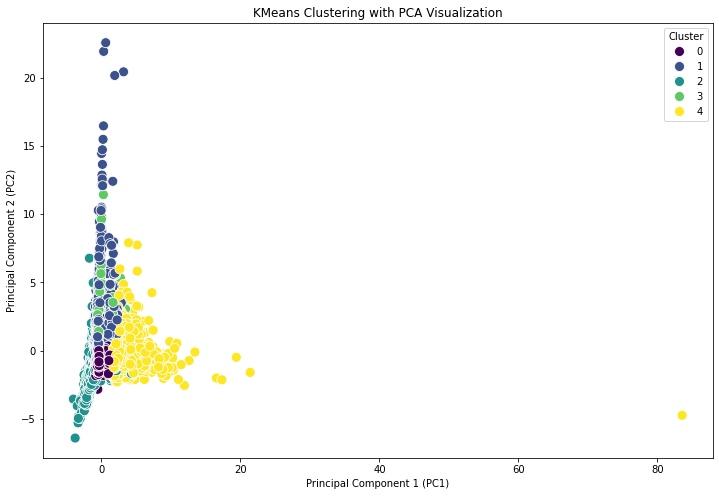

In [18]:
# code here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Set the number of clusters
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the normalized data
kmeans.fit(df_norm.drop('cluster_label', axis=1))  # Exclude the 'cluster_label' column for fitting

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_norm.drop('cluster_label', axis=1))

# Add the cluster labels to the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster_label'] = kmeans.labels_

# Plot the clustered points using a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='viridis', s=100)
plt.title('KMeans Clustering with PCA Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()


/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/

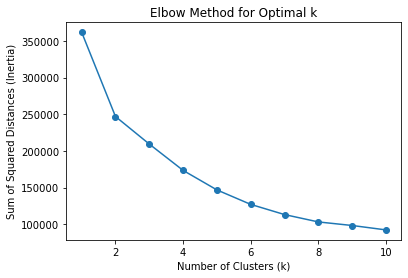

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df_norm' is your normalized DataFrame

# Specify a range of k values to test
k_values = range(1, 11)  # You can adjust this range based on your dataset

# Initialize an empty list to store the sum of squared distances (inertia) for each k
inertia_values = []

# Iterate through each k value
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the normalized data
    kmeans.fit(df_norm)
    
    # Append the sum of squared distances to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


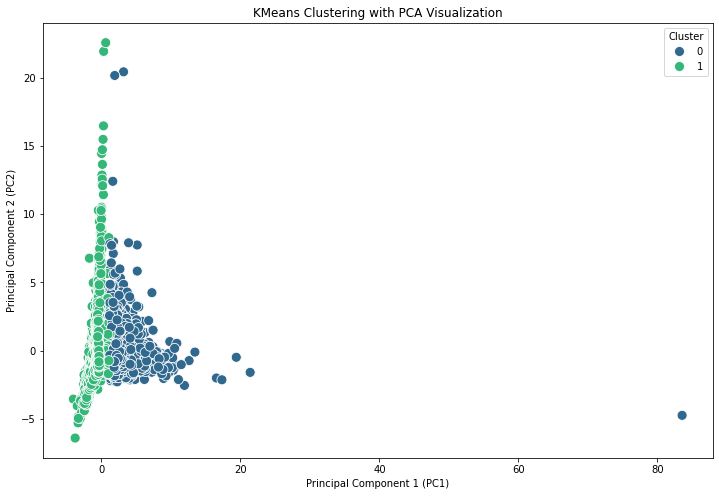

In [20]:
# Set the number of clusters
num_clusters =2

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the normalized data
kmeans.fit(df_norm.drop('cluster_label', axis=1))  # Exclude the 'cluster_label' column for fitting

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_norm.drop('cluster_label', axis=1))

# Add the cluster labels to the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster_label'] = kmeans.labels_

# Plot the clustered points using a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='viridis', s=100)
plt.title('KMeans Clustering with PCA Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()


### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [21]:
# code here

# Print the inertia
print("Inertia:", kmeans.inertia_)

Inertia: 221692.33474011745


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [22]:
# code here
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(df_norm.drop('cluster_label', axis=1))

# Compute the silhouette score
silhouette_avg = silhouette_score(df_norm.drop('cluster_label', axis=1), cluster_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.39855695442039946


Interpreting the silhouette score depends on the context and the specific characteristics of your data. In general, a silhouette score close to 1 indicates well-separated clusters, while a score close to -1 suggests that samples may have been assigned to the wrong cluster. A score around 0 indicates overlapping clusters.
    Close to 1: Good separation between clusters.
    Around 0: Overlapping clusters or poorly defined clusters.
    Close to -1: Samples may have been assigned to the wrong cluster.

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [23]:
# code here
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [24]:

# data = df_norm.drop('cluster_label', axis=1)  # Exclude the 'cluster_label' column for analysis

# # Set the range of clusters to test
# cluster_range = range(2, 22)

# # Initialize an empty list to store silhouette scores
# silhouette_scores = []

# # Loop through different numbers of clusters
# for num_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#     cluster_labels = kmeans.fit_predict(data)
    
#     # Calculate silhouette score
#     silhouette_avg = silhouette_score(data, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Plot the silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(cluster_range, silhouette_scores, marker='o')
# plt.title('Silhouette Analysis for Different Numbers of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()


In [25]:
# # Find the index of the maximum silhouette score
# optimal_cluster_index = np.argmax(silhouette_scores)

# # Get the optimal number of clusters
# optimal_num_clusters = cluster_range[optimal_cluster_index]

# # Print the optimal number of clusters
# print(f"Optimal Number of Clusters: {optimal_num_clusters}")

# # Plot the silhouette scores with a marker for the optimal number of clusters
# plt.figure(figsize=(10, 6))
# plt.plot(cluster_range, silhouette_scores, marker='o')
# plt.scatter(optimal_num_clusters, silhouette_scores[optimal_cluster_index], c='red', label='Optimal Number of Clusters')
# plt.title('Silhouette Analysis for Different Numbers of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.legend()
# plt.show()

What is the optimal number of clusters that you obtained?

*Answer here*
2

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [26]:
# code here
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming 'df_norm' is your normalized DataFrame
data = df_norm.drop('cluster_label', axis=1)  # Exclude the 'cluster_label' column for analysis

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage(data, method='ward'), orientation='top', labels=data.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, visually identify the optimal number of clusters

# Perform hierarchical clustering with the chosen number of clusters
num_clusters = 4  # Adjust based on the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = hierarchical_clustering.fit_predict(data)

# Add the cluster labels to the original DataFrame
df_norm['cluster_label_hierarchical'] = cluster_labels

# Display the count of data points in each cluster
print(df_norm['cluster_label_hierarchical'].value_counts())


How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [1]:
# install skimage
#!pip install scikit-image


#Code here

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 28.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 KB 7.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 KB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00:00:01


Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here